In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tabulate import tabulate
import joblib
import shap



In [2]:
def first_infos(df, name):

    n_cols = len(df.columns)
    n_rows = len(df)
    n_duplicates = df.duplicated().sum()
    n_na = df.isna().sum().sum()

    print(name,'\n')
    print('cols number :',n_cols)
    print('rows number :',n_rows)
    print('duplicated value :',n_duplicates)
    print('nan number :',n_na)
    print(df.info())



In [3]:
dataset_train = pd.read_csv('/home/drago/Documents/predict_energy/train.csv',sep=',')
dataset_client = pd.read_csv('/home/drago/Documents/predict_energy/client.csv',sep=',')
dataset_elec_prices = pd.read_csv('/home/drago/Documents/predict_energy/electricity_prices.csv',sep=',')
dataset_forcast_weather = pd.read_csv('/home/drago/Documents/predict_energy/forecast_weather.csv',sep=',')
dataset_gas_prices = pd.read_csv('/home/drago/Documents/predict_energy/gas_prices.csv',sep=',')
dataset_historical_weather = pd.read_csv('/home/drago/Documents/predict_energy/historical_weather.csv',sep=',')
dataset_weather_station = pd.read_csv('/home/drago/Documents/predict_energy/weather_station_to_county_mapping.csv',sep=',')


dataset_sample_submission = pd.read_csv('/home/drago/Documents/predict_energy/example_test_files/sample_submission.csv',sep=',')
dataset_test = pd.read_csv('/home/drago/Documents/predict_energy/example_test_files/test.csv',sep=',')
dataset_test_client = pd.read_csv('/home/drago/Documents/predict_energy/example_test_files/client.csv',sep=',')
dataset_test_elec_prices = pd.read_csv('/home/drago/Documents/predict_energy/example_test_files/electricity_prices.csv',sep=',')
dataset_test_forecast_weather = pd.read_csv('/home/drago/Documents/predict_energy/example_test_files/forecast_weather.csv',sep=',')
dataset_test_gas_prices = pd.read_csv('/home/drago/Documents/predict_energy/example_test_files/gas_prices.csv',sep=',')
dataset_test_historical_weather = pd.read_csv('/home/drago/Documents/predict_energy/example_test_files/historical_weather.csv',sep=',')
dataset_revealed_targets = pd.read_csv('/home/drago/Documents/predict_energy/example_test_files/revealed_targets.csv',sep=',')

In [26]:
dataset_forcast_weather

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424507,59.7,26.2,2023-05-30 02:00:00,48,10.150049,5.662744,0.061066,0.257339,0.004059,0.308594,6.890626,-3.258144,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
3424508,59.7,26.7,2023-05-30 02:00:00,48,10.259790,5.922754,0.107880,0.895203,0.198700,0.906036,6.890626,-3.768032,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
3424509,59.7,27.2,2023-05-30 02:00:00,48,10.467798,6.072534,0.000000,0.387466,0.448853,0.530518,6.214112,-4.700405,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
3424510,59.7,27.7,2023-05-30 02:00:00,48,10.694116,7.009058,0.000000,0.505936,0.997314,0.997498,5.810060,-4.338345,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0


In [27]:
dataset_test_forecast_weather

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2023-05-27 02:00:00,1,9.859155,5.508813,0.000000,0.000000,0.026901,0.026901,3.616620,-1.281012,634,2023-05-27 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2023-05-27 02:00:00,1,5.916284,4.613428,0.000000,0.000000,0.000000,0.000000,2.164227,-0.245367,634,2023-05-27 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2023-05-27 02:00:00,1,9.111963,6.878442,0.000000,0.000000,0.000000,0.000000,3.809247,-1.583502,634,2023-05-27 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2023-05-27 02:00:00,1,10.746606,5.006372,0.000000,0.000000,0.000000,0.000000,4.106854,-5.625006,634,2023-05-27 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2023-05-27 02:00:00,1,10.791895,4.701074,0.000000,0.000000,0.000000,0.000000,4.188153,-7.184332,634,2023-05-27 03:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21499,59.7,26.2,2023-05-30 02:00:00,48,10.150049,5.662744,0.061066,0.257339,0.004059,0.308594,6.890626,-3.258144,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
21500,59.7,26.7,2023-05-30 02:00:00,48,10.259790,5.922754,0.107880,0.895203,0.198700,0.906036,6.890626,-3.768032,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
21501,59.7,27.2,2023-05-30 02:00:00,48,10.467798,6.072534,0.000000,0.387466,0.448853,0.530518,6.214112,-4.700405,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
21502,59.7,27.7,2023-05-30 02:00:00,48,10.694116,7.009058,0.000000,0.505936,0.997314,0.997498,5.810060,-4.338345,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0


In [28]:
dataset_test_elec_prices

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2023-05-27 00:00:00,87.54,2023-05-26 00:00:00,634
1,2023-05-27 01:00:00,82.69,2023-05-26 01:00:00,634
2,2023-05-27 02:00:00,82.70,2023-05-26 02:00:00,634
3,2023-05-27 03:00:00,84.26,2023-05-26 03:00:00,634
4,2023-05-27 04:00:00,87.67,2023-05-26 04:00:00,634
...,...,...,...,...
91,2023-05-30 19:00:00,82.10,2023-05-29 19:00:00,637
92,2023-05-30 20:00:00,150.85,2023-05-29 20:00:00,637
93,2023-05-30 21:00:00,82.10,2023-05-29 21:00:00,637
94,2023-05-30 22:00:00,82.09,2023-05-29 22:00:00,637


In [29]:
dataset_test_client

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,507,4960.215,0,2023-05-26,634
1,2,0,11,34.000,0,2023-05-26,634
2,3,0,1516,15977.560,0,2023-05-26,634
3,0,0,25,1273.200,1,2023-05-26,634
4,1,0,98,2885.600,1,2023-05-26,634
...,...,...,...,...,...,...,...
257,1,15,51,415.600,0,2023-05-29,637
258,3,15,161,2035.750,0,2023-05-29,637
259,0,15,15,620.000,1,2023-05-29,637
260,1,15,20,624.500,1,2023-05-29,637


In [30]:
dataset_test_gas_prices

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2023-05-27,28.30,34.10,2023-05-26,634
1,2023-05-28,28.10,34.10,2023-05-27,635
2,2023-05-29,28.16,36.98,2023-05-28,636
3,2023-05-30,29.00,34.00,2023-05-29,637


In [31]:
dataset_test

,county,is_business,product_type,is_consumption,prediction_datetime,data_block_id,row_id,prediction_unit_id,currently_scored
0,0,0,1,0,2023-05-28 00:00:00,634,2005872,0,False
1,0,0,1,1,2023-05-28 00:00:00,634,2005873,0,False
2,0,0,2,0,2023-05-28 00:00:00,634,2005874,1,False
3,0,0,2,1,2023-05-28 00:00:00,634,2005875,1,False
4,0,0,3,0,2023-05-28 00:00:00,634,2005876,2,False
...,...,...,...,...,...,...,...,...,...
12475,15,1,0,1,2023-05-31 23:00:00,637,2018347,64,False
12476,15,1,1,0,2023-05-31 23:00:00,637,2018348,59,False
12477,15,1,1,1,2023-05-31 23:00:00,637,2018349,59,False
12478,15,1,3,0,2023-05-31 23:00:00,637,2018350,60,False


# 1.1 Merge dataset train

In [32]:
def merge_dataframe_train(dataset_train, dataset_gas_prices, dataset_client, dataset_elec_prices, dataset_forecast_weather):

    # merge df_train-gas_price and dataset_gas_prime
    # jointure du dataframe dataset_train et dataset_gas_prime

    df_train_gas = pd.merge(dataset_train, dataset_gas_prices, on='data_block_id', how='left')
    # merge dataset_client and dataset_elec_price
    # jointure du dataframe dataset_train et dataset_gas_prime

    df_client_elec = pd.merge(dataset_client, dataset_elec_prices, left_on='data_block_id', right_on='data_block_id')

    # merge df_train_gas and dataset_client
    df_train_gas_client = pd.merge(df_train_gas, dataset_client, on=['data_block_id', 'county', 'product_type', 'is_business'], how='left')

    # convert the variable datetime in datetime format 

    df_train_gas_client.datetime = pd.to_datetime(df_train_gas_client.datetime)
    dataset_forcast_weather.origin_datetime = pd.to_datetime(dataset_forcast_weather.origin_datetime)


    tab_df = []

    # Regrouper les données d'entraînement par année et mois
    grouped_train = df_train_gas_client.groupby([df_train_gas_client.datetime.dt.year, df_train_gas_client.datetime.dt.month])

    # Regrouper les données de prévision par année et mois
    grouped_forecast = dataset_forcast_weather.groupby([dataset_forcast_weather.origin_datetime.dt.year, dataset_forcast_weather.origin_datetime.dt.month])

    # Itérer sur les groupes de données
    for (year, month), df_train_group in grouped_train:

        if (year, month) in grouped_forecast.groups:
            df_forecast_group = grouped_forecast.get_group((year, month))
            # Effectuer la jointure interne entre les données de prévision et d'entraînement
            #df_merged = pd.merge(df_forecast_group, df_train_group, left_on='origin_datetime', right_on='datetime', how='inner')
            df_forecast_group = df_forecast_group.loc[df_forecast_group.origin_datetime.isin(df_train_group.datetime.unique())]
            df = pd.concat([df_forecast_group.reset_index(),df_train_group.reset_index()],axis=1)
            tab_df.append(df.dropna())
            #tab_df.append(df_train_group)


        else:
            print(f"Aucune donnée de prévision pour {year}-{month}.")

    df_train_forecast = pd.concat(tab_df, axis=0)
    df_train_forecast = df_train_forecast.reset_index().drop(columns=["index","level_0"])
    df_train_forecast.set_index('datetime',inplace=True)

    return df_train_forecast

# 1.2 Merge dataset test

In [33]:
def merge_dataframe_test(dataset_test, dataset_test_gas_prices, dataset_test_client, dataset_test_elec_prices, dataset_test_forecast_weather):

    # merge df_test-gas_price and dataset_gas_prime
    # jointure du dataframe dataset_train et dataset_gas_prime

    df_test_gas = pd.merge(dataset_test, dataset_test_gas_prices, on='data_block_id', how='left')
    # merge dataset_client and dataset_elec_price
    # jointure du dataframe dataset_train et dataset_gas_prime

    df_client_elec = pd.merge(dataset_test_client, dataset_test_elec_prices, left_on='data_block_id', right_on='data_block_id')

    # merge df_train_gas and dataset_client
    df_test_gas_client = pd.merge(df_test_gas, dataset_test_client, on=['data_block_id', 'county', 'product_type', 'is_business'], how='left')
    print(df_test_gas_client.columns)
    # convert the variable datetime in datetime format 
    df_test_gas_client.prediction_datetime = pd.to_datetime(df_test_gas_client.prediction_datetime)
    dataset_test_forecast_weather.origin_datetime = pd.to_datetime(dataset_test_forecast_weather.origin_datetime)
    print(dataset_test_forecast_weather.columns)
    tab_df = []

    # Regrouper les données d'entraînement par année et mois
    grouped_test = df_test_gas_client.groupby([df_test_gas_client.prediction_datetime.dt.year, df_test_gas_client.prediction_datetime.dt.month])

    # Regrouper les données de prévision par année et mois
    grouped_forecast = dataset_test_forecast_weather.groupby([dataset_test_forecast_weather.origin_datetime.dt.year, dataset_test_forecast_weather.origin_datetime.dt.month])
    
    # Itérer sur les groupes de données
    for (year, month), df_test_group in grouped_test:

        if (year, month) in grouped_forecast.groups:
            df_forecast_group = grouped_forecast.get_group((year, month))
            # Effectuer la jointure interne entre les données de prévision et d'entraînement
            #df_merged = pd.merge(df_forecast_group, df_train_group, left_on='origin_datetime', right_on='datetime', how='inner')
            df_forecast_group = df_forecast_group.loc[df_forecast_group.origin_datetime.isin(df_test_group.prediction_datetime.unique())]
            df = pd.concat([df_forecast_group.reset_index(),df_test_group.reset_index()],axis=1)
            tab_df.append(df.dropna())


        else:
            print(f"Aucune donnée de prévision pour {year}-{month}.")
    
    print(tab_df[0].columns, tab_df[0].shape)
    df_test_forecast = pd.concat(tab_df, axis=0)
    df_test_forecast = df_test_forecast.reset_index().drop(columns=["index","level_0"])
    df_test_forecast.set_index('prediction_datetime',inplace=True)

    return df_test_forecast

In [34]:
df_train_forecast = merge_dataframe_train(dataset_train, dataset_gas_prices,dataset_client, dataset_elec_prices, dataset_forcast_weather)
df_train_forecast.head()


,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,...,data_block_id,row_id,prediction_unit_id,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,eic_count,installed_capacity,date
datetime,,,,,,,,,,,,,,,,,,,,,
2021-09-03,58.2,23.7,2021-09-02 02:00:00,5,13.476221,6.160547,0.0,0.238205,0.304855,0.367310,...,2.0,5856.0,0.0,2021-09-02,45.62,46.29,2021-09-01,108.0,952.89,2021-09-01
2021-09-03,58.2,24.2,2021-09-02 02:00:00,5,11.961450,7.848840,0.0,0.025429,0.007751,0.029190,...,2.0,5857.0,0.0,2021-09-02,45.62,46.29,2021-09-01,108.0,952.89,2021-09-01
2021-09-03,58.2,24.7,2021-09-02 02:00:00,5,10.000146,6.802637,0.0,0.000954,0.000412,0.001251,...,2.0,5858.0,1.0,2021-09-02,45.62,46.29,2021-09-01,17.0,166.40,2021-09-01
2021-09-03,58.2,25.2,2021-09-02 02:00:00,5,8.649683,6.022607,0.0,0.002556,0.000214,0.002609,...,2.0,5859.0,1.0,2021-09-02,45.62,46.29,2021-09-01,17.0,166.40,2021-09-01
2021-09-03,58.2,25.7,2021-09-02 02:00:00,5,8.485620,5.985437,0.0,0.008598,0.000153,0.008652,...,2.0,5860.0,2.0,2021-09-02,45.62,46.29,2021-09-01,688.0,7207.88,2021-09-01


In [35]:
df_test_forecast = merge_dataframe_test(dataset_test, dataset_test_gas_prices,dataset_test_client, dataset_test_elec_prices,dataset_test_forecast_weather)


Index(['county', 'is_business', 'product_type', 'is_consumption',
       'prediction_datetime', 'data_block_id', 'row_id', 'prediction_unit_id',
       'currently_scored', 'forecast_date', 'lowest_price_per_mwh',
       'highest_price_per_mwh', 'origin_date', 'eic_count',
       'installed_capacity', 'date'],
      dtype='object')
Index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead',
       'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'data_block_id', 'forecast_datetime',
       'direct_solar_radiation', 'surface_solar_radiation_downwards',
       'snowfall', 'total_precipitation'],
      dtype='object')
Index(['index', 'latitude', 'longitude', 'origin_datetime', 'hours_ahead',
       'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_com

In [36]:
mask = df_test_forecast.isin(dataset_test.row_id.unique())


In [37]:
df_test_forecast = df_test_forecast.loc[mask.row_id]
df_test_forecast.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,...,row_id,prediction_unit_id,currently_scored,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,eic_count,installed_capacity,date
prediction_datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-28,57.6,21.7,2023-05-28 02:00:00,1,9.301904,4.898340,0.0,0.0,0.0,0.0,...,2005872.0,0.0,False,2023-05-27,28.3,34.1,2023-05-26,507.0,4960.215,2023-05-26
2023-05-28,57.6,22.2,2023-05-28 02:00:00,1,6.866357,3.836816,0.0,0.0,0.0,0.0,...,2005873.0,0.0,False,2023-05-27,28.3,34.1,2023-05-26,507.0,4960.215,2023-05-26
2023-05-28,57.6,22.7,2023-05-28 02:00:00,1,9.098047,4.527002,0.0,0.0,0.0,0.0,...,2005874.0,1.0,False,2023-05-27,28.3,34.1,2023-05-26,11.0,34.000,2023-05-26
2023-05-28,57.6,23.2,2023-05-28 02:00:00,1,10.904932,5.130029,0.0,0.0,0.0,0.0,...,2005875.0,1.0,False,2023-05-27,28.3,34.1,2023-05-26,11.0,34.000,2023-05-26
2023-05-28,57.6,23.7,2023-05-28 02:00:00,1,11.734277,6.269434,0.0,0.0,0.0,0.0,...,2005876.0,2.0,False,2023-05-27,28.3,34.1,2023-05-26,1516.0,15977.560,2023-05-26


In [38]:
df_train_forecast.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,...,data_block_id,row_id,prediction_unit_id,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,eic_count,installed_capacity,date
datetime,,,,,,,,,,,,,,,,,,,,,
2021-09-03,58.2,23.7,2021-09-02 02:00:00,5,13.476221,6.160547,0.0,0.238205,0.304855,0.367310,...,2.0,5856.0,0.0,2021-09-02,45.62,46.29,2021-09-01,108.0,952.89,2021-09-01
2021-09-03,58.2,24.2,2021-09-02 02:00:00,5,11.961450,7.848840,0.0,0.025429,0.007751,0.029190,...,2.0,5857.0,0.0,2021-09-02,45.62,46.29,2021-09-01,108.0,952.89,2021-09-01
2021-09-03,58.2,24.7,2021-09-02 02:00:00,5,10.000146,6.802637,0.0,0.000954,0.000412,0.001251,...,2.0,5858.0,1.0,2021-09-02,45.62,46.29,2021-09-01,17.0,166.40,2021-09-01
2021-09-03,58.2,25.2,2021-09-02 02:00:00,5,8.649683,6.022607,0.0,0.002556,0.000214,0.002609,...,2.0,5859.0,1.0,2021-09-02,45.62,46.29,2021-09-01,17.0,166.40,2021-09-01
2021-09-03,58.2,25.7,2021-09-02 02:00:00,5,8.485620,5.985437,0.0,0.008598,0.000153,0.008652,...,2.0,5860.0,2.0,2021-09-02,45.62,46.29,2021-09-01,688.0,7207.88,2021-09-01


In [39]:
df_test_forecast.drop(columns='currently_scored', inplace=True)

In [40]:
df_train_forecast.index.min(), df_train_forecast.index.max(),df_test_forecast.index.min(),df_test_forecast.index.max()

(Timestamp('2021-09-03 00:00:00'),
 Timestamp('2023-05-31 23:00:00'),
 Timestamp('2023-05-28 00:00:00'),
 Timestamp('2023-05-31 23:00:00'))

# Prediction de la variale target avec le modèle Xgboost

In [41]:
def new_features(df_features):
    
        df_features["hour"] = df_features["datetime"].dt.hour
        df_features["day"] = df_features["datetime"].dt.day
        df_features["weekday"] = df_features["datetime"].dt.weekday
        df_features["month"] = df_features["datetime"].dt.month
        df_features["year"] = df_features["datetime"].dt.year
        df_features["dayofyear"] = df_features["datetime"].dt.dayofyear
        
        # Ajouter les colonnes sinusoïdales pour capturer la cyclicité
        df_features["sin_dayofyear"] = np.sin(np.pi * df_features["dayofyear"] / 183)
        df_features["cos_dayofyear"] = np.cos(np.pi * df_features["dayofyear"] / 183)
        df_features["sin_hour"] = np.sin(np.pi * df_features["hour"] / 12)
        df_features["cos_hour"] = np.cos(np.pi * df_features["hour"] / 12)
        
        return df_features

In [42]:
def new_features_test(df_features):
    
        df_features["hour"] = df_features["origin_datetime"].dt.hour
        df_features["day"] = df_features["origin_datetime"].dt.day
        df_features["weekday"] = df_features["origin_datetime"].dt.weekday
        df_features["month"] = df_features["origin_datetime"].dt.month
        df_features["year"] = df_features["origin_datetime"].dt.year
        df_features["dayofyear"] = df_features["origin_datetime"].dt.dayofyear
        
        # Ajouter les colonnes sinusoïdales pour capturer la cyclicité
        df_features["sin_dayofyear"] = np.sin(np.pi * df_features["dayofyear"] / 183)
        df_features["cos_dayofyear"] = np.cos(np.pi * df_features["dayofyear"] / 183)
        df_features["sin_hour"] = np.sin(np.pi * df_features["hour"] / 12)
        df_features["cos_hour"] = np.cos(np.pi * df_features["hour"] / 12)
        
        return df_features

In [43]:
df_train_forecast['datetime'] = df_train_forecast.index
df_train_forecast2 = new_features(df_train_forecast)
cols = df_train_forecast2.drop(columns=['latitude', 'longitude','county','row_id','origin_datetime',
                                        'date','hours_ahead','forecast_datetime','datetime',
                                        'forecast_date','origin_date','data_block_id','prediction_unit_id']).columns
cols

Index(['temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'direct_solar_radiation',
       'surface_solar_radiation_downwards', 'snowfall', 'total_precipitation',
       'is_business', 'product_type', 'target', 'is_consumption',
       'lowest_price_per_mwh', 'highest_price_per_mwh', 'eic_count',
       'installed_capacity', 'hour', 'day', 'weekday', 'month', 'year',
       'dayofyear', 'sin_dayofyear', 'cos_dayofyear', 'sin_hour', 'cos_hour'],
      dtype='object')

In [44]:
df_test_forecast['datetime'] = df_test_forecast.index
df_test_forecast2 = new_features_test(df_test_forecast)
cols = df_test_forecast2.drop(columns=['latitude', 'longitude','county','row_id','origin_datetime',
                                        'date','hours_ahead','forecast_datetime','datetime',
                                        'forecast_date','origin_date','data_block_id','prediction_unit_id']).columns
cols

Index(['temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'direct_solar_radiation',
       'surface_solar_radiation_downwards', 'snowfall', 'total_precipitation',
       'is_business', 'product_type', 'is_consumption', 'lowest_price_per_mwh',
       'highest_price_per_mwh', 'eic_count', 'installed_capacity', 'hour',
       'day', 'weekday', 'month', 'year', 'dayofyear', 'sin_dayofyear',
       'cos_dayofyear', 'sin_hour', 'cos_hour'],
      dtype='object')

In [45]:
# Création de variables retardées
def create_lagged_features(df, target,lags):
    for lag in lags:
        df[f'{target}_lag_{lag}'] = df[target].shift(lag)
    return df


# Prediction de l'auto consommations et de l'auto productions d'énergie électriques

/home/drago/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:03:12] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


temps d execution :  128.6556589603424
MSE: 210.84812376688424


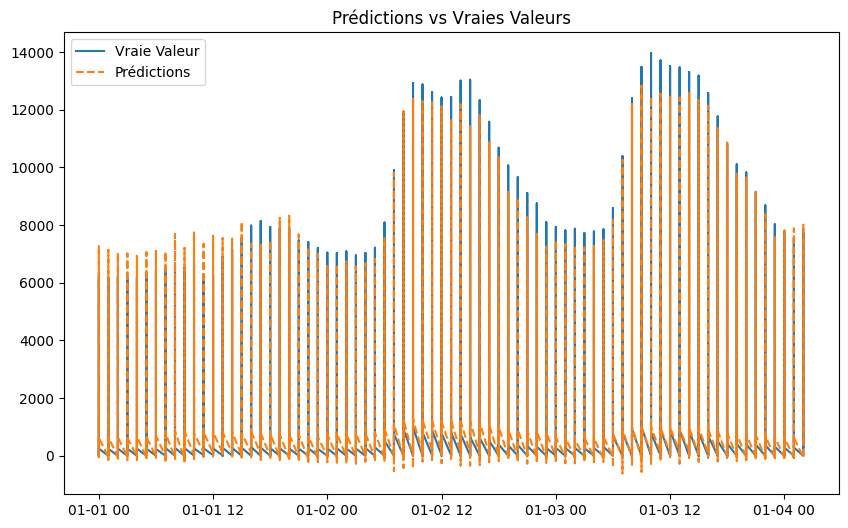

In [46]:
import time

cols = df_train_forecast2.drop(columns=['latitude', 'longitude','county','row_id','origin_datetime',
                                        'date','hours_ahead','forecast_datetime','datetime',
                                        'forecast_date','origin_date','data_block_id','prediction_unit_id']).columns

# Synchroniser les indices des variables exogènes avec les composantes de la série temporelle
X_train = df_train_forecast2.loc[(df_train_forecast2.index.year>=2021)&(df_train_forecast2.index.year<=2022), cols]
X_test = df_train_forecast2.loc[(df_train_forecast2.index.year==2023), cols]
# Utiliser les composantes pour la modélisation
# Séparation des données en ensemble d'entraînement et de test
y_train = df_train_forecast2.target.loc[(df_train_forecast2.index.year>=2021)&(df_train_forecast2.index.year<=2022)]
y_test = df_train_forecast2.target.loc[(df_train_forecast2.target.index.year == 2023)]

X_train.drop(columns='target',inplace=True)
X_test.drop(columns='target',inplace=True)

t1 = time.time()
# Créer et entraîner le modèle XGBoost
model = XGBRegressor(objective='reg:squarederror', subsample = 0.6, n_estimators=300, learning_rate=0.1, max_depth=6,tree_method='hist', device='cuda')
model.fit(X_train, y_train)
t2 = time.time()
print('temps d execution : ', (t2-t1))# Meilleurs paramètres trouvés : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}
# Meilleurs paramètres trouvés : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}

# Faire des prédictions
y_pred = model.predict(X_test[:10000])

# Calculer l'erreur quadratique moyenne
mse = np.sqrt(mean_squared_error(y_test[:10000], y_pred[:10000]))
print(f'MSE: {mse}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.index[:10000], y_test[:10000], label='Vraie Valeur')
plt.plot(y_test.index[:10000], y_pred, label='Prédictions', linestyle='--')
plt.legend()
plt.title('Prédictions vs Vraies Valeurs')
plt.show()

# Prédiction de la Consommation Énergétique à 40 Jours

/home/drago/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:19:41] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


temps d execution :  26.743115663528442
temps d execution :  3.215261936187744
MAE: 456.47549682077954


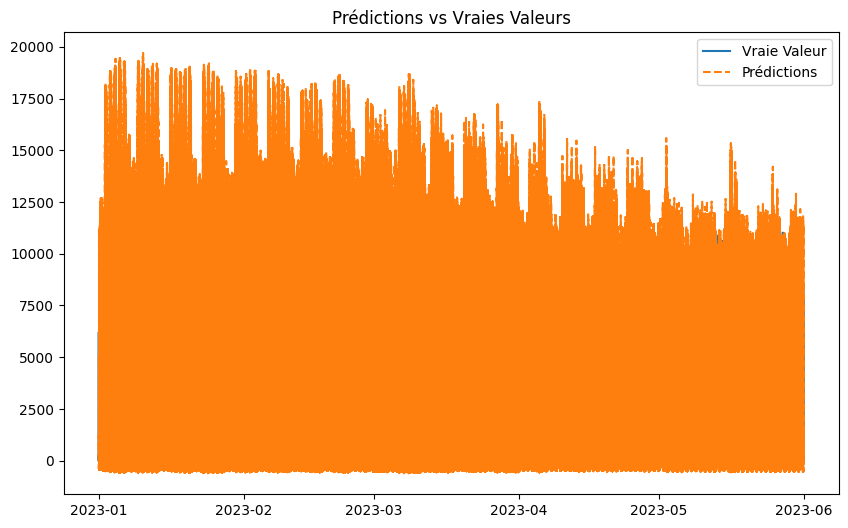

In [63]:
import time

cols = df_train_forecast2.drop(columns=[ 'latitude', 'longitude','county','row_id','origin_datetime',
                                        'date','hours_ahead','forecast_datetime','datetime',
                                        'forecast_date','origin_date','data_block_id','prediction_unit_id']).columns

# Synchroniser les indices des variables exogènes avec les composantes de la série temporelle
X_train = df_train_forecast2.loc[(df_train_forecast2.index.year>=2021)&(df_train_forecast2.index.year<=2022), cols]
X_test = df_train_forecast2.loc[(df_train_forecast2.index.year==2023), cols]

y_train = df_train_forecast2.target.loc[(df_train_forecast2.index.year>=2021)&(df_train_forecast2.index.year<=2022)]
y_test = df_train_forecast2.target.loc[(df_train_forecast2.target.index.year == 2023)]
lags = [1, 2, 3, 7, 14, 40] 

X_train_lag = create_lagged_features(X_train,'target',lags=lags)
X_train_lag.dropna(inplace=True)
X_test_lag = create_lagged_features(X_test,'target',lags=lags)
X_test_lag.dropna(inplace=True)

X_train_lag.drop(columns='target',inplace=True)
X_test_lag.drop(columns='target',inplace=True)

t1 = time.time()
# Créer et entraîner le modèle 
model = XGBRegressor(objective='reg:squarederror', subsample = 0.6, n_estimators=300, learning_rate=0.1, max_depth=6,reg_lambda=1, gamma = 50,tree_method='hist', device='cuda')
model.fit(X_train_lag, y_train[40:])
t2 = time.time()
print('temps d execution : ', (t2-t1))# Meilleurs paramètres trouvés : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}
# Meilleurs paramètres trouvés : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}

# Faire des prédictions
y_resid = model.predict(X_train_lag)

t1 = time.time()
# Créer et entraîner le modèle XGBoost
model2 =  LinearRegression()
model2.fit(X_train_lag, y_resid)
t2 = time.time()
print('temps d execution : ', (t2-t1))# Meilleurs paramètres trouvés : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}
# Meilleurs paramètres trouvés : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}

# Faire des prédictions
y_resid2_test= model2.predict(X_test_lag)
y_resid_test= model.predict(X_test_lag)
y_test_final = y_resid_test + y_resid2_test

# Calculer l'erreur quadratique moyenne
mae = mean_absolute_error(y_test[40:], y_test_final)
print(f'MAE: {mae}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Vraie Valeur')
plt.plot(y_test.index[40:], y_test_final, label='Prédictions', linestyle='--')
plt.legend()
plt.title('Prédictions vs Vraies Valeurs')
plt.show()

## Entraînement du modèle avec deux estimateurs 

/home/drago/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:25:05] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/home/drago/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:25:50] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/home/drago/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:26:10] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/home/drago/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:26:27] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/home/drago/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:26:43] WARNING: /workspace/src/context.cc:44: No visib

MAE (Stacking Model): 123.25636305340942


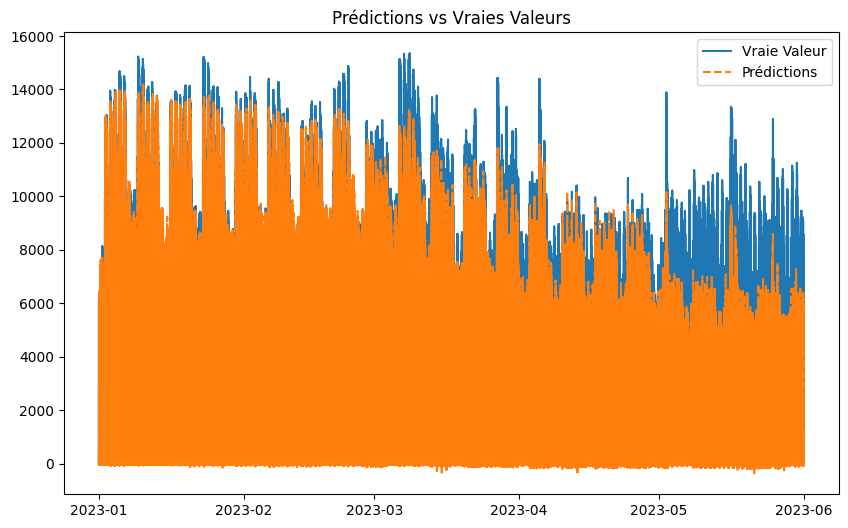

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Entraînement de la régression linéaire
lin_reg = LinearRegression()

# Entraînement du modèle XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', subsample=0.6, n_estimators=300, 
                         learning_rate=0.1, max_depth=6, reg_lambda=1, gamma = 50, tree_method='hist', device='cuda')

# Empilement avec un modèle final de régression linéaire
stacking_regressor = StackingRegressor(
    estimators=[('lr', lin_reg), ('xgb', xgb_model)],
    final_estimator=LinearRegression()
)

stacking_regressor.fit(X_train_lag, y_train[40:])

# Prédiction finale
y_test_final = stacking_regressor.predict(X_test_lag)

# Calcul du MSE
mae_final = mean_absolute_error(y_test[40:], y_test_final)
print(f'MAE (Stacking Model): {mae_final}')

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Vraie Valeur')
plt.plot(y_test.index[40:], y_test_final, label='Prédictions', linestyle='--')
plt.legend()
plt.title('Prédictions vs Vraies Valeurs')
plt.show()


- Les résultats obtenus par la combinaison des deux modèles n'améliorent pas les prédictions.
- Je vais donc entraîner les données sur le modèle Xgboost en saisissant les hyper paramètres obtenus par la recherche par grille dans le notebook projet_enefit_1(Grid Search CV)

/home/drago/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [21:05:00] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


temps d execution :  28.973718881607056
MAE: 119.43283975356859


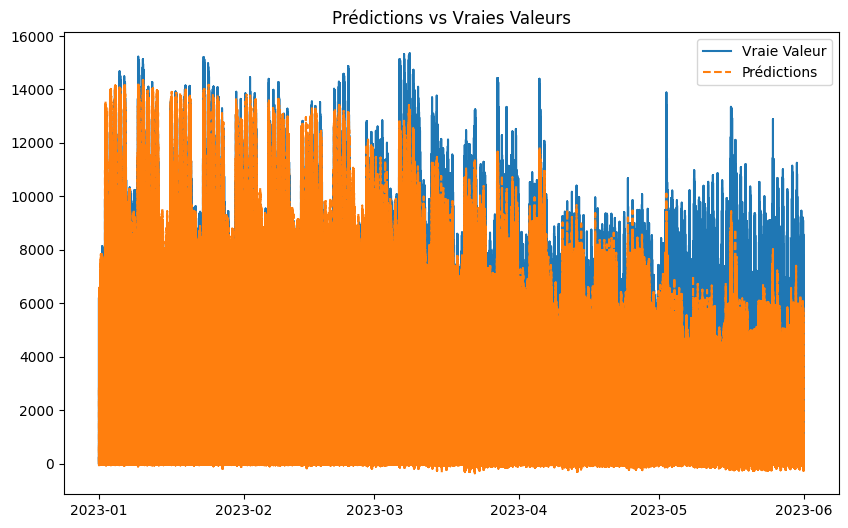

In [65]:
import time

cols = df_train_forecast2.drop(columns=[ 'latitude', 'longitude','county','row_id','origin_datetime',
                                        'date','hours_ahead','forecast_datetime','datetime',
                                        'forecast_date','origin_date','data_block_id','prediction_unit_id']).columns

# Synchroniser les indices des variables exogènes avec les composantes de la série temporelle
X_train = df_train_forecast2.loc[(df_train_forecast2.index.year>=2021)&(df_train_forecast2.index.year<=2022), cols]
X_test = df_train_forecast2.loc[(df_train_forecast2.index.year==2023), cols]
# Utiliser les composantes pour la modélisation
# Séparation des données en ensemble d'entraînement et de test
y_train = df_train_forecast2.target.loc[(df_train_forecast2.index.year>=2021)&(df_train_forecast2.index.year<=2022)]
y_test = df_train_forecast2.target.loc[(df_train_forecast2.target.index.year == 2023)]

lags = [1, 2, 3, 7, 14, 40] 

X_train_lag = create_lagged_features(X_train,'target',lags=lags)
X_train_lag.dropna(inplace=True)
X_test_lag = create_lagged_features(X_test,'target',lags=lags)
X_test_lag.dropna(inplace=True)

X_train_lag.drop(columns='target',inplace=True)
X_test_lag.drop(columns='target',inplace=True)

t1 = time.time()
# Créer et entraîner le modèle XGBoost
model = XGBRegressor(objective='reg:squarederror', subsample = 0.6, n_estimators=300, learning_rate=0.1, max_depth=6,reg_lambda=12,tree_method='hist', device='cuda')
model.fit(X_train_lag, y_train[40:])
t2 = time.time()
print('temps d execution : ', (t2-t1))# Meilleurs paramètres trouvés : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}
# Meilleurs paramètres trouvés : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}

# Faire des prédictions
y_pred = model.predict(X_test_lag)

# Calculer l'erreur quadratique moyenne
mae = mean_absolute_error(y_test[40:], y_pred)
print(f'MAE: {mae}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Vraie Valeur')
plt.plot(y_test.index[40:], y_pred, label='Prédictions', linestyle='--')
plt.legend()
plt.title('Prédictions vs Vraies Valeurs')
plt.show()

# Interpréation du modèle 

In [66]:
# Importance des caractéristiques par "weight"
importance_weight = model.get_booster().get_score(importance_type='weight')

# Importance des caractéristiques par "gain"
importance_gain = model.get_booster().get_score(importance_type='gain')

# Importance des caractéristiques par "cover"
importance_cover = model.get_booster().get_score(importance_type='cover')


In [67]:
df_importances_weight = pd.DataFrame({
    'Feature': list(importance_gain.keys()),
    'Gain': list(importance_gain.values())
})

# Trier le DataFrame par poids (du plus élevé au plus bas)
df_importances_gain_sorted = df_importances_weight.sort_values(by='Gain', ascending=True)


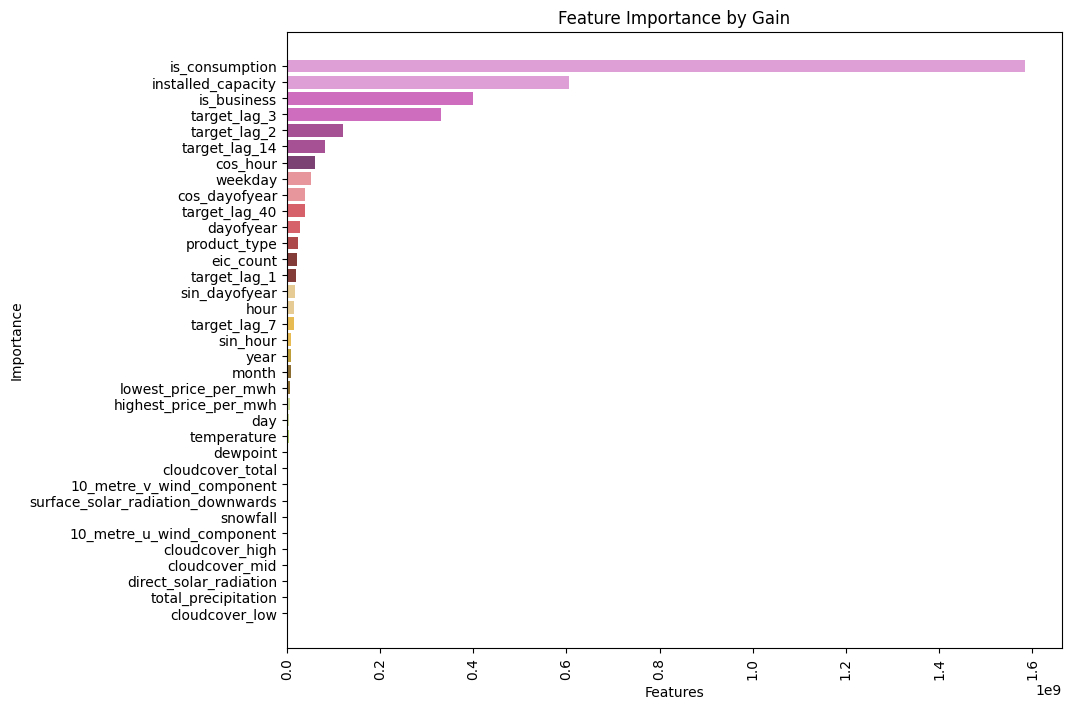

In [68]:
# Visualiser l'importance par 'gain'
colors = plt.cm.tab20b(np.linspace(0, 1, len(df_importances_gain_sorted)))

plt.figure(figsize=(10, 8))
plt.barh(df_importances_gain_sorted.Feature, df_importances_gain_sorted.Gain, color= colors)
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90) 
plt.title('Feature Importance by Gain')
plt.show()


# Les variables contribuants au performance du modèle Xgboost
 - is_consumption 
 - installed_capacity 
 - is_business
 - target_lag3
 - target_lag2
 - target_lag14
 - cos_hour
 - weekday
 - cos_dayofyear
 - target_lag1
 - month
 - eic_count

In [69]:

# Créer un explainer SHAP avec TreeExplainer
explainer = shap.TreeExplainer(model)

In [70]:
# Calculer les valeurs SHAP pour les données test
shap_values = explainer.shap_values(X_test_lag, check_additivity=False)

In [71]:
df_shap = pd.DataFrame(shap_values, columns=model.feature_names_in_)
df_shap.head()

,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,direct_solar_radiation,surface_solar_radiation_downwards,...,sin_dayofyear,cos_dayofyear,sin_hour,cos_hour,target_lag_1,target_lag_2,target_lag_3,target_lag_7,target_lag_14,target_lag_40
0,0.529014,-0.184429,-0.043544,0.032866,0.029663,0.017550,-0.016412,-1.522724,0.010163,0.013521,...,-0.674598,-6.127246,-0.558399,-18.108477,-31.008303,-78.996712,23.249544,-6.825785,-31.113064,-21.897823
1,1.509297,-0.487028,-0.103566,-0.001074,-0.010846,-0.000659,-0.009830,-1.698956,0.013138,0.014547,...,-1.499360,-0.974308,-2.074802,-39.170372,81.661888,47.149815,42.190353,30.330816,17.010065,28.621971
2,-0.619890,-0.500693,-0.002779,-0.003194,0.030736,0.014139,0.022192,0.495663,0.008868,0.001933,...,-1.246226,-3.114526,-0.368044,-12.980124,-17.844830,-53.315495,5.531439,-2.056201,-31.694174,-14.842564
3,0.056216,-2.207140,-0.081927,0.007293,0.019040,0.018519,0.018287,0.745018,0.012653,0.003593,...,-2.202744,-6.683378,-1.081349,-30.064140,36.776134,37.863007,35.896103,14.603913,-15.150923,-2.903794
4,-0.212139,-0.139446,-0.003852,-0.003047,0.032890,0.016872,0.025551,0.508721,0.009240,0.001746,...,-0.975745,-4.762312,-0.509859,-15.681828,-19.801056,-98.449409,-21.871881,-5.056836,-27.484282,-30.196594


In [32]:
#df_shap.target_lag_2[df_shap.target_lag_2 >= 0].sum()

In [72]:
df_shap.target_lag_1.sum()

for col in model.feature_names_in_:
    print(f'colonne |{col}|, somme des shap values : {df_shap[col].sum()}')

colonne |temperature|, somme des shap values : 485639.90625
colonne |dewpoint|, somme des shap values : 276254.53125
colonne |cloudcover_high|, somme des shap values : -4439.2294921875
colonne |cloudcover_low|, somme des shap values : 24728.38671875
colonne |cloudcover_mid|, somme des shap values : -3413.09228515625
colonne |cloudcover_total|, somme des shap values : 12617.5791015625
colonne |10_metre_u_wind_component|, somme des shap values : -3364.489990234375
colonne |10_metre_v_wind_component|, somme des shap values : 30405.431640625
colonne |direct_solar_radiation|, somme des shap values : -15248.8583984375
colonne |surface_solar_radiation_downwards|, somme des shap values : -10253.39453125
colonne |snowfall|, somme des shap values : 3152.9609375
colonne |total_precipitation|, somme des shap values : -5732.31787109375
colonne |is_business|, somme des shap values : -7598560.5
colonne |product_type|, somme des shap values : 1508745.125
colonne |is_consumption|, somme des shap values

# Interprétation globale 

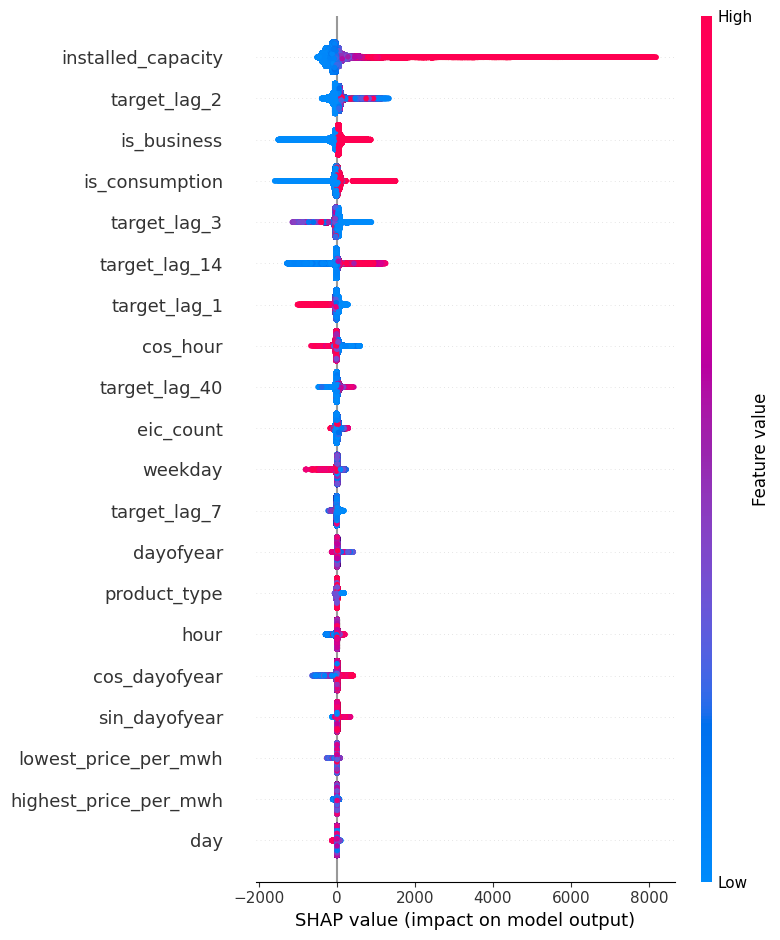

In [73]:
# Résumer des variables qui influencent les prédictions de la consommation et de la production électrique 
shap.summary_plot(shap_values, X_test_lag, feature_names=model.feature_names_in_)

# Importance des variables sur la prédiction global du modèle :


- Les valeurs SHAP négatives diminuent les prédictions du modèle, tandis que les valeurs SHAP positives les augmentent.

- La variable installed_capacity présente des valeurs SHAP majoritairement positives. Par conséquent, elle contribue à augmenter les prédictions du modèle.
- En revanche, les variables telles que sin_hour, highest_price_per_mwh, lowest_price_per_mwh, sin_dayofyear, hour, et product_type n'ont pas de valeurs SHAP élevées, ce qui signifie qu'elles ont une contribution limitée à l'amélioration des prédictions du modèle XGBoost.


# Interprétation locale

In [36]:
print('Nombre de valeur pour le premier janvier 2023 :',len(y_test.loc[(y_test.index.month == 1)&(y_test.index.day ==1)].index))

Nombre de valeur pour le premier janvier 2023 : 3216


In [74]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[40], X_test_lag.iloc[40,:],feature_names=model.feature_names_in_)

# "Entraînement du Modèle en Éliminant les Variables Non Contributives Basé sur l'Analyse SHAP

/home/drago/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [21:21:30] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


temps d execution :  24.99138307571411
MAE: 62.443467219052415


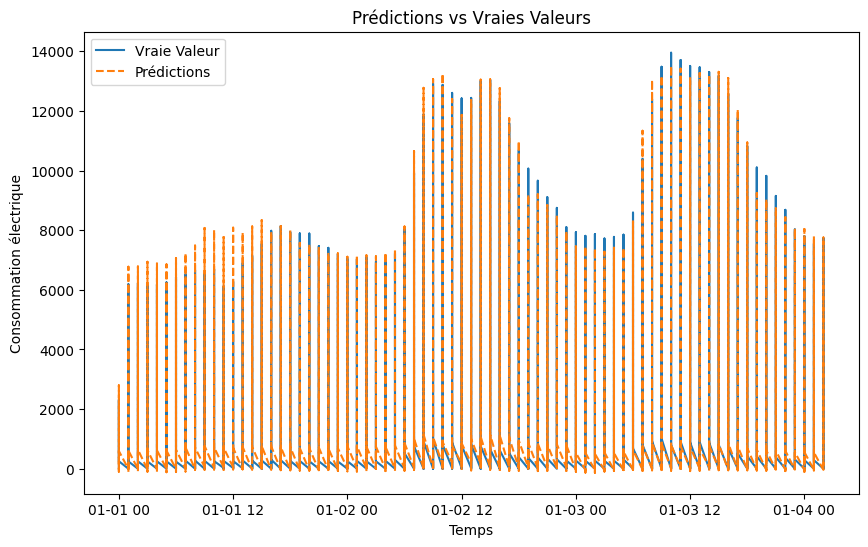

In [77]:
"""cols = ['is_business', 'product_type','is_consumption', 'lowest_price_per_mwh', 'highest_price_per_mwh',
 'eic_count', 'installed_capacity', 'hour', 'weekday','month', 'year', 'dayofyear', 'sin_dayofyear',
 'cos_dayofyear','sin_hour', 'cos_hour','target']"""



cols = df_train_forecast2.drop(columns=[ 'latitude', 'longitude','county','row_id','origin_datetime',
                                        'date','hours_ahead','forecast_datetime','datetime',
                                        'forecast_date','origin_date','data_block_id','prediction_unit_id']).columns

# Synchroniser les indices des variables exogènes avec les composantes de la série temporelle
X_train = df_train_forecast2.loc[(df_train_forecast2.index.year>=2021)&(df_train_forecast2.index.year<=2022), cols]
X_test = df_train_forecast2.loc[(df_train_forecast2.index.year==2023), cols]
# Utiliser les composantes pour la modélisation
# Séparation des données en ensemble d'entraînement et de test
y_train = df_train_forecast2.target.loc[(df_train_forecast2.index.year>=2021)&(df_train_forecast2.index.year<=2022)]
y_test = df_train_forecast2.target.loc[(df_train_forecast2.target.index.year == 2023)]

lags = [3, 7, 14] 

X_train_lag = create_lagged_features(X_train,'target',lags=lags)
X_train_lag.dropna(inplace=True)
X_test_lag = create_lagged_features(X_test,'target',lags=lags)
X_test_lag.dropna(inplace=True)

X_train_lag.drop(columns='target',inplace=True)
X_test_lag.drop(columns='target',inplace=True)

t1 = time.time()
# Créer et entraîner le modèle XGBoost
model = XGBRegressor(objective='reg:squarederror', subsample = 0.6, n_estimators=300, learning_rate=0.1, max_depth=6,tree_method='hist', device='cuda')
model.fit(X_train_lag, y_train[14:])
t2 = time.time()
print('temps d execution : ', (t2-t1))# Meilleurs paramètres trouvés : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}
# Meilleurs paramètres trouvés : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}

# Faire des prédictions
y_pred = model.predict(X_test_lag[:10000])

# Calculer l'erreur quadratique moyenne
mae = mean_absolute_error(y_test[14:10014], y_pred[:10000])
print(f'MAE: {mae}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.index[14:10014], y_test[14:10014], label='Vraie Valeur')
plt.plot(y_test.index[14:10014], y_pred, label='Prédictions', linestyle='--')
plt.xlabel('Temps')
plt.ylabel('Consommation électrique')
plt.legend()
plt.title('Prédictions vs Vraies Valeurs')
plt.savefig("Analyse_consommation_electrique.png")
plt.show()

In [79]:
# sauvegarde des fichiers tests

#X_test_lag.to_csv('/kaggle/working/x_test2.csv')
#y_test.to_csv('/kaggle/working/y_test2.csv')

In [ ]:
y_test

In [ ]:
# Sauvegarder le modèle avec joblib
joblib.dump(model, '/kaggle/working/xgboost_model.joblib')

In [ ]:
# Charger le modèle
loaded_model = joblib.load('/kaggle/working/xgboost_model.joblib')

# Faire des prédictions
y_pred = loaded_model.predict(X_test_lag)

list(y_pred[:10]), y_test[14:24]

In [ ]:
!pip install skforecast

In [ ]:
y = y_train.reset_index(drop=True)
y.head()

In [ ]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from xgboost import XGBRegressor
from skforecast.model_selection import bayesian_search_forecaster

forecaster = ForecasterAutoreg(
                 regressor = XGBRegressor(random_state=42,  tree_method='gpu_hist', gpu_id=0 ),
                 lags      = 7  , # This value will be replaced in the grid search
             )

# Regressor hyperparameters search space
def search_space(trial):
    search_space  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 100, 300, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'subsample'     : trial.suggest_float('subsample', 0.1, 1, step = 0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1., step = 0.1),
        'lags'          : trial.suggest_categorical('lags', [7, 14, 21, 28])
    } 
    return search_space

results_search, frozen_trial = bayesian_search_forecaster(
                                   forecaster         = forecaster,
                                   y                  = y[:100000],
                                   steps              = 7,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space,
                                   initial_train_size = len(y[:80000]),
                                   refit              = False,
                                   n_trials           = 5, 
                                   random_state       = 42,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = True
                               )

In [ ]:
_, predictions_val = backtesting_forecaster(
                         forecaster         = forecaster,
                         y                  =  y[:100000],
                         steps              = 7, # changed from 24 to see if intervals are smaller
                         metric             = 'mean_absolute_error',
                         initial_train_size = len( y[:80000]),
                         refit              = False,
                         n_jobs             = 'auto',
                         verbose            = False,
                         show_progress      = True
                     )

In [ ]:
predictions_val

In [ ]:
residuals = y_train[80000:100000].values - predictions_val['pred']
residuals = residuals.dropna()

residuals

In [ ]:
import pandas as pd
import numpy as np

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import bayesian_search_forecaster
from sklearn.metrics import mean_pinball_loss

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
import seaborn as sns

from skforecast.plot import plot_residuals


In [ ]:
# Out-sample residuals distribution
# ==============================================================================
print(pd.Series(np.where(residuals < 0, 'negative', 'positive')).value_counts())
plt.rcParams.update({'font.size': 8})
_ = plot_residuals(residuals=residuals, figsize=(10, 8))

In [ ]:
# Store out-sample residuals in the forecaster
# ==============================================================================
forecaster.set_out_sample_residuals(residuals=residuals)

In [ ]:
from skforecast.model_selection import backtesting_forecaster

metric, predictions = backtesting_forecaster(
                          forecaster          = forecaster,
                          y                   = y[:100000],
                          steps               = 7, 
                          metric              = 'mean_absolute_error',
                          initial_train_size = len(y[:80000]),
                          refit               = False,
                          interval            = [10, 90], # 80% prediction interval
                          n_boot              = 10,      # number of bootstrapped samples
                          in_sample_residuals = False,    # Use out-sample (validation set) residuals
                          binned_residuals    = False,
                          n_jobs              = 'auto',
                          verbose             = False,
                          show_progress       = True
                      )